## BANK MARKETING

This project takes data related to direct marketing campaign with a goal to predict whether the client will subscribe a term deposit.

Data comes from Portuguese bank and contains the information about marketing campaigns based on phone calls.

Source: UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bank+marketing)

Task: classification    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'bank-additional-full.csv'
df = pd.read_csv(file_path,header=0, sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(str(df.shape[0]) + ' rows')
print(str(df.shape[1]) + ' columns')

41188 rows
21 columns


In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# read data again with specified data types
df = pd.read_csv(file_path, header=0, decimal='.', sep=';', 
                 dtype = {1:'category',2:'category',3:'category',
                          4:'category',5:'category',6:'category',
                          7:'category',8:'category',9:'category',14:'category',20:'category'})

In [8]:
# check data types and number of nulls
summary = pd.DataFrame(df.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(df.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(df.isnull().sum())
summary['Per_of_nulls'] = round((df.apply(pd.isnull).mean()*100),2)
summary.Dtype = summary.Dtype.astype(str)
print(summary)
## what is the % of observations containing nulls
print("% of observations containing nulls:")
print((df.isnull().any(axis=1).sum()/df.shape[0])*100)

                   Dtype  Nulls  Sum_of_nulls  Per_of_nulls
age                int64  False             0           0.0
job             category  False             0           0.0
marital         category  False             0           0.0
education       category  False             0           0.0
default         category  False             0           0.0
housing         category  False             0           0.0
loan            category  False             0           0.0
contact         category  False             0           0.0
month           category  False             0           0.0
day_of_week     category  False             0           0.0
duration           int64  False             0           0.0
campaign           int64  False             0           0.0
pdays              int64  False             0           0.0
previous           int64  False             0           0.0
poutcome        category  False             0           0.0
emp.var.rate     float64  False         

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.select_dtypes(['category']).describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
# convert target variable to binary
df.y.replace('yes',1, inplace=True)
df.y.replace('no',0, inplace=True)
df['y'] = df['y'].astype('uint8')

In [12]:
# Distribution of target variable
count = df.groupby('y').size()
percent = count/len(df)*100
print(percent)

y
0    88.734583
1    11.265417
dtype: float64


Target variable in unevenly distributed. More than 80% of observations are "NO" and only 11% are "YES"

## Analysis of categorical variables

#### Job

In [13]:
cat = pd.DataFrame(df['job'].value_counts())
cat.rename(columns={'job':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.job,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

               num_of_obs  Per_of_obs
admin.              10422   25.303486
blue-collar          9254   22.467709
technician           6743   16.371273
services             3969    9.636302
management           2924    7.099155
retired              1720    4.175974
entrepreneur         1456    3.535010
self-employed        1421    3.450034
housemaid            1060    2.573565
unemployed           1014    2.461882
student               875    2.124405
unknown               330    0.801204
                   
                   
y                 0     1  NO_ratio
job                                
admin.         9070  1352  0.870274
blue-collar    8616   638  0.931057
entrepreneur   1332   124  0.914835
housemaid       954   106  0.900000
management     2596   328  0.887825
retired        1286   434  0.747674
self-employed  1272   149  0.895144
services       3646   323  0.918619
student         600   275  0.685714
technician     6013   730  0.891740
unemployed      870   144  0.85798

#### Marital

In [14]:
cat = pd.DataFrame(df['marital'].value_counts())
cat.rename(columns={'marital':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.marital,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

          num_of_obs  Per_of_obs
married        24928   60.522482
single         11568   28.085850
divorced        4612   11.197436
unknown           80    0.194231
                   
                   
y             0     1  NO_ratio
marital                        
divorced   4136   476  0.896791
married   22396  2532  0.898427
single     9948  1620  0.859959
unknown      68    12  0.850000


#### Education

In [15]:
cat = pd.DataFrame(df['education'].value_counts())
cat.rename(columns={'education':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.education,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

                     num_of_obs  Per_of_obs
university.degree         12168   29.542585
high.school                9515   23.101389
basic.9y                   6045   14.676605
professional.course        5243   12.729436
basic.4y                   4176   10.138875
basic.6y                   2292    5.564728
unknown                    1731    4.202680
illiterate                   18    0.043702
                   
                   
y                        0     1  NO_ratio
education                                 
basic.4y              3748   428  0.897510
basic.6y              2104   188  0.917976
basic.9y              5572   473  0.921754
high.school           8484  1031  0.891645
illiterate              14     4  0.777778
professional.course   4648   595  0.886515
university.degree    10498  1670  0.862755
unknown               1480   251  0.854997


Within "education" variable perentage of unknowns is significantly higher. I will impute it with mode value.

##### Default

In [16]:
cat = pd.DataFrame(df['default'].value_counts())
cat.rename(columns={'default':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.default,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

         num_of_obs  Per_of_obs
no            32588   79.120132
unknown        8597   20.872584
yes               3    0.007284
                   
                   
y            0     1  NO_ratio
default                       
no       28391  4197   0.87121
unknown   8154   443   0.94847
yes          3     0   1.00000


This variable has many unknowns and is highly unbalanced. I will drop it from the dataset.


In [17]:
df.drop("default", axis=1, inplace=True)

##### Housing

In [18]:
cat = pd.DataFrame(df['housing'].value_counts())
cat.rename(columns={'housing':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.housing,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

         num_of_obs  Per_of_obs
yes           21576   52.384190
no            18622   45.212198
unknown         990    2.403613
                   
                   
y            0     1  NO_ratio
housing                       
no       16596  2026  0.891204
unknown    883   107  0.891919
yes      19069  2507  0.883806


In [19]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [20]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

##### Loan

In [21]:
cat = pd.DataFrame(df['loan'].value_counts())
cat.rename(columns={'loan':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.loan,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

         num_of_obs  Per_of_obs
no            33950   82.426920
yes            6248   15.169467
unknown         990    2.403613
                   
                   
y            0     1  NO_ratio
loan                          
no       30100  3850  0.886598
unknown    883   107  0.891919
yes       5565   683  0.890685


##### Contact

In [22]:
cat = pd.DataFrame(df['contact'].value_counts())
cat.rename(columns={'contact':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.contact,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

           num_of_obs  Per_of_obs
cellular        26144   63.474798
telephone       15044   36.525202
                   
                   
y              0     1  NO_ratio
contact                         
cellular   22291  3853  0.852624
telephone  14257   787  0.947687


##### Month

In [23]:
cat = pd.DataFrame(df['month'].value_counts())
cat.rename(columns={'month':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.month,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

     num_of_obs  Per_of_obs
may       13769   33.429640
jul        7174   17.417694
aug        6178   14.999514
jun        5318   12.911528
nov        4101    9.956784
apr        2632    6.390211
oct         718    1.743226
sep         570    1.383898
mar         546    1.325629
dec         182    0.441876
                   
                   
y          0    1  NO_ratio
month                      
apr     2093  539  0.795213
aug     5523  655  0.893979
dec       93   89  0.510989
jul     6525  649  0.909534
jun     4759  559  0.894885
mar      270  276  0.494505
may    12883  886  0.935653
nov     3685  416  0.898561
oct      403  315  0.561281
sep      314  256  0.550877


#### Day of week

In [24]:
cat = pd.DataFrame(df['day_of_week'].value_counts())
cat.rename(columns={'day_of_week':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.day_of_week,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

     num_of_obs  Per_of_obs
thu        8623   20.935709
mon        8514   20.671069
wed        8134   19.748470
tue        8090   19.641643
fri        7827   19.003108
                   
                   
y               0     1  NO_ratio
day_of_week                      
fri          6981   846  0.891913
mon          7667   847  0.900517
thu          7578  1045  0.878812
tue          7137   953  0.882200
wed          7185   949  0.883329


##### poutcome

In [25]:
cat = pd.DataFrame(df['poutcome'].value_counts())
cat.rename(columns={'poutcome':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.poutcome,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

             num_of_obs  Per_of_obs
nonexistent       35563   86.343110
failure            4252   10.323395
success            1373    3.333495
                   
                   
y                0     1  NO_ratio
poutcome                          
failure       3647   605  0.857714
nonexistent  32422  3141  0.911678
success        479   894  0.348871


## Analysis of numerical variables

In [26]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


From the table it can be observed that some variables have outliers. They will dealt with using 1.5IQR method or with Min-Max approach.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Age

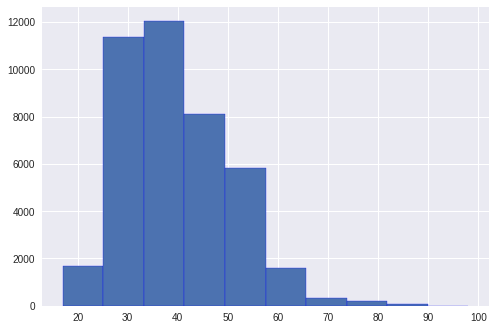

In [28]:
plt.hist(df.age, edgecolor="b")
plt.show()

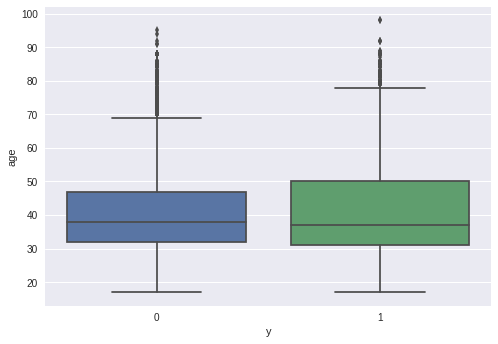

In [29]:
sns.boxplot(x = "y", y="age", data=df)
plt.show()

Considering the meaning of this variable I will not treat any value as outlier.

##### Duration

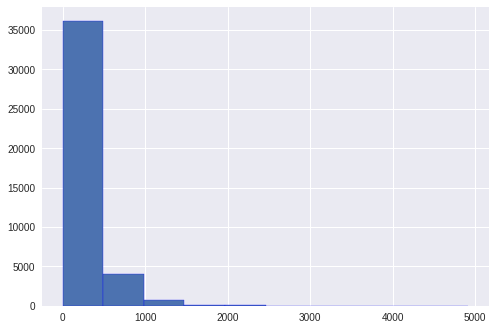

In [31]:
plt.hist(df.duration, edgecolor="b")
plt.show()

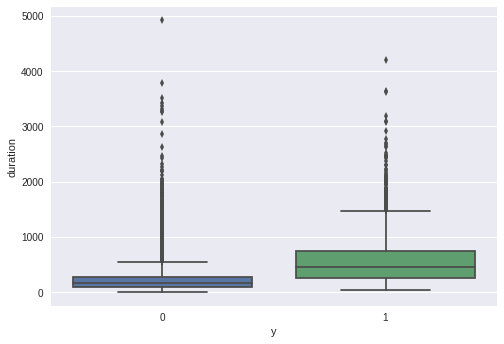

In [32]:
sns.boxplot(x = "y", y="duration", data=df)
plt.show()

Based on the graphs, I define outliers as values exceeding 2500. Those will be replaced with value 2500.

In [33]:
col_values = df["duration"].values
df["duration"] = np.where(col_values>2500, 2500, col_values)

##### Campaign

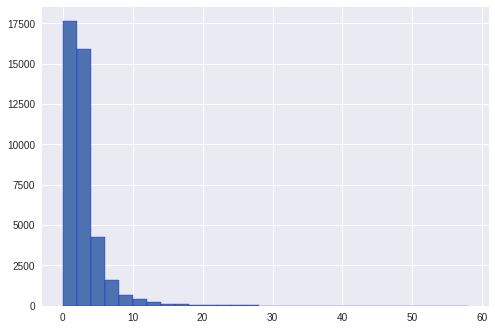

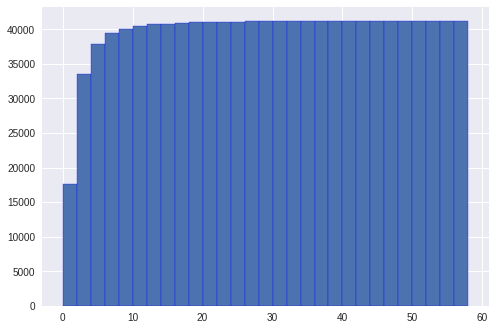

In [34]:
plt.hist(df.campaign,bins = np.arange(0, 60, 2), edgecolor="b")
plt.show()
plt.hist(df.campaign,bins = np.arange(0, 60, 2),cumulative=True, edgecolor="b")
plt.show()

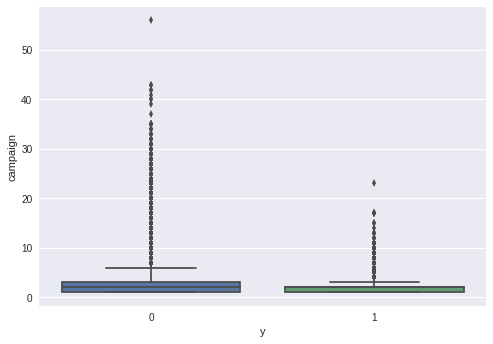

In [35]:
sns.boxplot(x = "y", y="campaign", data=df)
plt.show()

I will use value 20 as cut off.

In [36]:
col_values = df["campaign"].values
df["campaign"] = np.where(col_values>20, 20, col_values)

##### Pdays

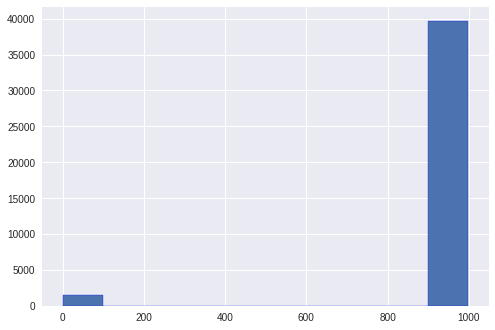

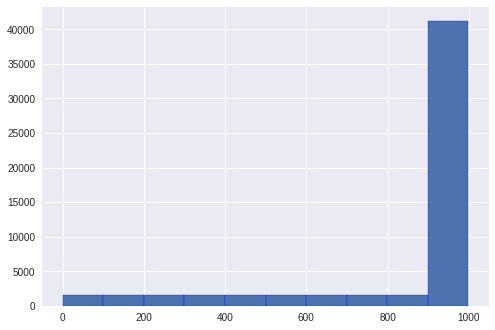

In [37]:
plt.hist(df.pdays, edgecolor="b")
plt.show()
plt.hist(df.pdays,cumulative=True, edgecolor="b")
plt.show()

In [38]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

"pdays" variable is highly unbalanced and imputing mean or median does not make any sense. Over 95% of clients were not contacted before (value 999). I will exclude it from the dataset.

In [39]:
df.drop("pdays", axis=1, inplace=True)

##### Previous

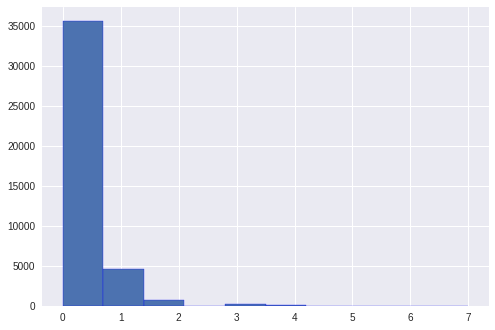

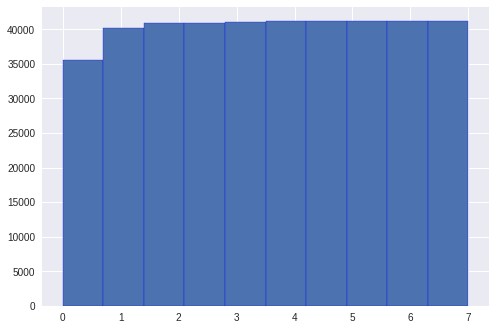

In [40]:
plt.hist(df.previous, edgecolor="b")
plt.show()
plt.hist(df.previous,cumulative=True, edgecolor="b")
plt.show()

In [41]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Another variable which is highly unbalanced. 86% of clients were not previously contacted during this campaign. I will try to make it a binary variable.

In [42]:
col_values = df["previous"].values
df["previous"] = np.where(col_values>0, 1, 0)

Last variables are economic indicators. I will remove them from the dataset as they are not customer-specific.

In [43]:

df.drop(["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], axis=1, inplace=True)

In [44]:
df.describe()

,age,duration,campaign,previous,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,257.869234,2.541566,0.136569,0.112654
std,10.42125,254.733653,2.541681,0.343396,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,0.000000
max,98.00000,2500.000000,20.000000,1.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
age            41188 non-null int64
job            41188 non-null category
marital        41188 non-null category
education      41188 non-null category
housing        41188 non-null category
loan           41188 non-null category
contact        41188 non-null category
month          41188 non-null category
day_of_week    41188 non-null category
duration       41188 non-null int64
campaign       41188 non-null int64
previous       41188 non-null int64
poutcome       41188 non-null category
y              41188 non-null uint8
dtypes: category(9), int64(4), uint8(1)
memory usage: 1.7 MB


## Preparation for modelling

In [46]:
df_y = df["y"]
df_x = df.drop("y", axis=1)

In [47]:
df_x.shape

(41188, 13)

In [48]:
df_x_with_dummies = pd.get_dummies(df_x)

In [49]:
df_x_with_dummies.columns

Index(['age', 'duration', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
    

In [50]:
df_x_with_dummies.shape

(41188, 54)

In [51]:
df_x_with_dummies["marital_unknown"].value_counts()

0    41108
1       80
Name: marital_unknown, dtype: int64

In [52]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [53]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [54]:
# split to train and test

x_train, x_test, y_train, y_test = train_test_split(df_x_with_dummies,df_y,test_size=0.2, stratify=df_y)

In [55]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.887344
1    0.112656
Name: y, dtype: float64
0    0.887351
1    0.112649
Name: y, dtype: float64


## Model selection

### Logistic Regression

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])
pipe.fit(x_train, y_train)
pred = pipe.predict(x_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.906


#### Optimize parameters

In [58]:
params = [{"standarization__with_mean":[True,False], "LogisticRegression__C":[0.1,0.2,0.3,0.5,1,1.5,2],
           "LogisticRegression__penalty":["l1","l2"]}]

In [59]:
gs = GridSearchCV(estimator=pipe,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'standarization__with_mean': [True, False], 'LogisticRegression__C': [0.1, 0.2, 0.3, 0.5, 1, 1.5, 2], 'LogisticRegression__penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
gs.best_params_

{'LogisticRegression__C': 0.1,
 'LogisticRegression__penalty': 'l1',
 'standarization__with_mean': True}

In [61]:
accuracy_score(gs.best_estimator_.predict(x_test),y_test)

0.9061665452779801

The accuracy result has not improved. In the next step I will calculate ROC AUC.

In [62]:
print(classification_report(y_test, gs.best_estimator_.predict(x_test)))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7310
          1       0.66      0.34      0.45       928

avg / total       0.89      0.91      0.89      8238



One can notice that the model has a tendency to classify most of observations as 0 - low recall for 1. It is most likely driven by the fact that the classes are highly unbalanced.

In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
roc_auc_score(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])

0.9073760849568376

AUC for Logistic Regression is 0,91.

### LDA

In [65]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X=x_train,y=y_train)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [66]:
lda_model.predict(x_test)
preds = lda_model.predict(x_test)
preds_prob = lda_model.predict_proba(x_test)[:,1]
score = accuracy_score(y_pred=preds, y_true=y_test)
print("Benchmark:")
print(score)
print(roc_auc_score(y_true=y_test, y_score=preds_prob))

Benchmark:
0.9050740470988103
0.907672089485353


In [67]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95      7310
          1       0.60      0.45      0.52       928

avg / total       0.90      0.91      0.90      8238



In [68]:
from sklearn.metrics import roc_curve

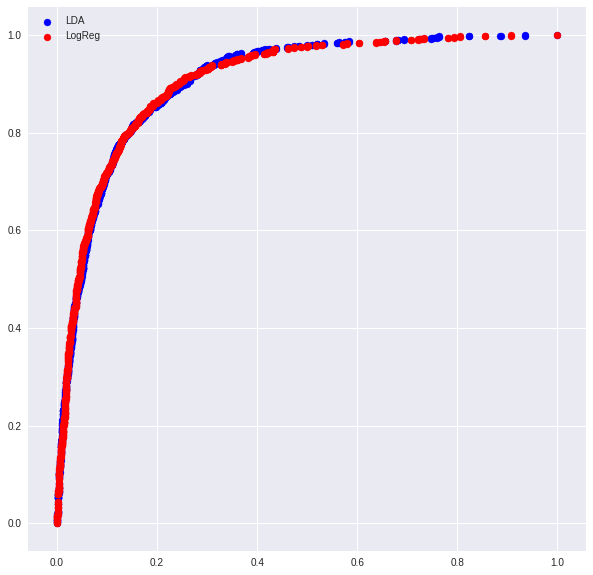

In [69]:
roc_result = roc_curve(y_true=y_test, y_score=preds_prob)
fpr, tpr, _ = roc_result

roc_result_2 = roc_curve(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])
fpr2, tpr2, _2 = roc_result_2

from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(fpr, tpr, c="blue", label = "LDA")
plt.scatter(fpr2, tpr2, c="red", label = "LogReg")
plt.legend()
plt.show()

Logistic Regression and LDA produce comparable results.

## Decision Tree

In [70]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.878


In [62]:
DecisionTreeClassifier??

In [71]:
params = [{"criterion":["gini","entropy"], "max_depth":[3,4,5,7,9,15,20,25],
           "min_samples_split":[3,4,5,10], "min_samples_leaf": [1,3,5,10]}]

In [72]:
gs = GridSearchCV(estimator=model,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 7, 9, 15, 20, 25], 'min_samples_split': [3, 4, 5, 10], 'min_samples_leaf': [1, 3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [74]:
accuracy_score(gs.best_estimator_.predict(x_test),y_test)

0.9044671036659383

In [75]:
roc_auc_score(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])

0.7790926163969999

All three models produce similar results. The results are not impressive considering the ditribution of target variable. 

As a next step I will check how the models perform on balanced classes. I will use undersampling approach.

#### Undersampling

In [76]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [77]:
df1 = df[df['y']==0].sample(n=4640)
df2 = df[df['y']==1]
print(df1.shape)
print(df2.shape)

(4640, 14)
(4640, 14)


In [78]:
df_undersampled = pd.concat([df1,df2])
df_undersampled.shape

(9280, 14)

In [79]:
df_undersampled_y = df_undersampled["y"]
df_undersampled_x = df_undersampled.drop("y", axis=1)

In [80]:
df_undersampled_x_with_dummies = pd.get_dummies(df_undersampled_x)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(df_undersampled_x_with_dummies,
                                                    df_undersampled_y,test_size=0.2, stratify=df_undersampled_y)

In [82]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

1    0.5
0    0.5
Name: y, dtype: float64
1    0.5
0    0.5
Name: y, dtype: float64


### Logistic Regression

In [83]:
pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])
pipe.fit(x_train, y_train)
pred_train = pipe.predict(x_train)
pred_test = pipe.predict(x_test)

print('Benchmark: ' + str(round(accuracy_score(pred_train, y_train),3)))
print('Accuracy on test: ' + str(round(accuracy_score(pred_test, y_test),3)))

Benchmark: 0.843
Accuracy on test: 0.84


#### Optimize parameters

In [84]:
params = [{"standarization__with_mean":[True,False], "LogisticRegression__C":[0.05,0.1,0.2,0.5,1,1.5],
           "LogisticRegression__penalty":["l1","l2"]}]

In [85]:
gs = GridSearchCV(estimator=pipe,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'standarization__with_mean': [True, False], 'LogisticRegression__C': [0.05, 0.1, 0.2, 0.5, 1, 1.5], 'LogisticRegression__penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
gs.best_params_

{'LogisticRegression__C': 0.05,
 'LogisticRegression__penalty': 'l2',
 'standarization__with_mean': False}

In [87]:
accuracy_score(gs.best_estimator_.predict(x_test),y_test)

0.8410560344827587

For dataset with balanced classes accuracy result on test is 84%. 

In [88]:
roc_auc_score(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])

0.9199578719530321

In [89]:
print(classification_report(y_test, gs.best_estimator_.predict(x_test)))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       928
          1       0.85      0.83      0.84       928

avg / total       0.84      0.84      0.84      1856



### LDA

In [90]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X=x_train,y=y_train)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [91]:
lda_model.predict(x_test)
preds = lda_model.predict(x_test)
preds_prob = lda_model.predict_proba(x_test)[:,1]
score = accuracy_score(y_pred=preds, y_true=y_test)
print(score)
print(roc_auc_score(y_true=y_test, y_score=preds_prob))

0.8313577586206896
0.9185121878715815


Again results for LDA are comparable to Logistic Regression.

In [92]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       928
          1       0.86      0.79      0.82       928

avg / total       0.83      0.83      0.83      1856



Both models have similar precision. For Logistic Regression 83% of actual positive responses are correctly predicted. For LDA it is 79%. Precision and recall for positive responses is significantly higher than in previous models based on unbalanced classes.

As the last step I will check whether I can obtain better results on balanced classes using Decision Tree Model with parameters optimization.

## Decision Tree

In [93]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.801


In [94]:
params = {'criterion':('entropy','gini'),
         'splitter':('best','random'),
         'max_depth':(2,3,4,5,6,7,8,9,10),
         'min_samples_split':(2,3,4,5,6,7,8,9,10),
         'min_samples_leaf':(3,4,5)}

gs = GridSearchCV(model, params,cv=10)


In [95]:
gs.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ('entropy', 'gini'), 'splitter': ('best', 'random'), 'max_depth': (2, 3, 4, 5, 6, 7, 8, 9, 10), 'min_samples_split': (2, 3, 4, 5, 6, 7, 8, 9, 10), 'min_samples_leaf': (3, 4, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [97]:
cv = cross_val_score(DecisionTreeClassifier(**gs.best_params_), x_train, y_train, cv = 10, scoring = 'accuracy')
print('Average Accuracy: ' + str(cv.mean().round(3)))

Average Accuracy: 0.834


In [98]:

print('Accuracy on test: ' + str(accuracy_score(y_pred=gs.predict(x_test), y_true=y_test)))

Accuracy on test: 0.8453663793103449


Optimization of Decision Tree parameters resulted in 84% accuracy on test. The result is comparable to the results of Logistic Regression and LDA.

In [95]:
roc_auc_score(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])

0.884951415725327

## Data reduction

As the last step I will check whether the variance within the data can be explained using smaller number of variables. I will use PCA technique.

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [100]:
pca = PCA()

In [101]:
df_undersampled_x_with_dummies

,age,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
11357,31,9,20,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
35574,36,156,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
14411,39,231,2,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
33317,41,527,2,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
39294,27,384,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
13784,27,377,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
28183,43,1096,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9339,38,514,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
36686,37,145,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
21249,38,102,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [104]:
df_scaled = scale(df_undersampled_x_with_dummies)

In [105]:
df_scaled

array([[-0.78086937, -1.07028086,  8.19653554, ..., -0.36481383,
         0.53331892, -0.34066893],
       [-0.36406556, -0.65016759, -0.602809  , ...,  2.74112412,
        -1.87505069, -0.34066893],
       [-0.11398327, -0.43582409, -0.1396856 , ..., -0.36481383,
         0.53331892, -0.34066893],
       ...,
       [-0.28070479, -0.29292842, -0.602809  , ..., -0.36481383,
         0.53331892, -0.34066893],
       [ 2.72028269, -0.14145901, -0.602809  , ..., -0.36481383,
         0.53331892, -0.34066893],
       [ 0.30282055,  0.16719563, -0.602809  , ..., -0.36481383,
         0.53331892, -0.34066893]])

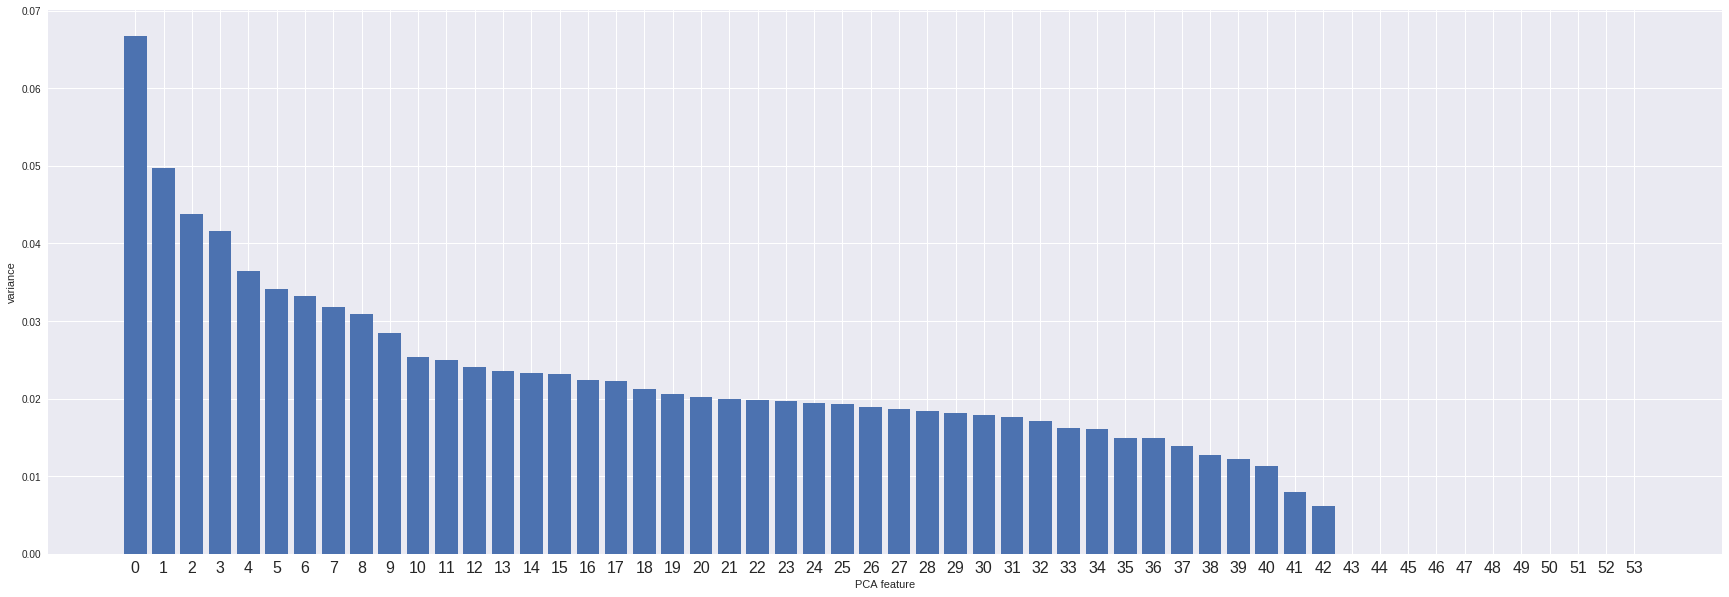

In [130]:
pca.fit(df_scaled)

plt.figure(figsize=(30,10))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)

plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(range(pca.n_components_), fontsize=16)

plt.show()

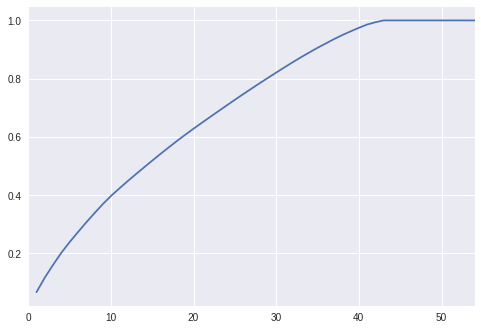

In [123]:

plt.plot(range(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,54)
plt.show()

From the graphs above it can be observed that 42 variables fully explain the variance within the dataset.